# Atlas notebooks

***

> This notebook reproduces and extends parts of the figures and products of the AR6-WGI Atlas. It is part of a notebook collection available at https://github.com/IPCC-WG1/Atlas for reproducibility and reusability purposes. This work is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0).
>
> ![Creative Commons License >](https://i.creativecommons.org/l/by/4.0/88x31.png)

## Create stripes of anual temperature and precipitation mean values.

13/7/2021

**M. Iturbide** (Santander Meteorology Group. Institute of Physics of Cantabria, CSIC-UC, Santander, Spain).

This notebook creates stripes figures using data from [datasets-aggregated-regionally](https://github.com/IPCC-WG1/Atlas/tree/devel/datasets-aggregated-regionally). The resulting figures show years in the x axis and model names in the y axis. Despite mean results are shown for each model and year, the values are not necessarily annual, as the user can select the season of interest. 

### Load packages and functions
This notebook is based on the R programming language and requires packages:

 * `magrittr` to pipe (`%>%`) sequences of operations
 * `httr` to handle URLs and HTTP
 * `lattice` and `latticeExtra` to produce the figures
 * `RColorBrewer` for producing color palettes

In [1]:
library(magrittr)
library(httr)
library(lattice)
library(latticeExtra)
library(RColorBrewer)

The main function to generate the stripes is `computeStripes`, available in this repository. To load this functions in the working environment use the `source` R base function as follows.

In [2]:
source("../datasets-aggregated-regionally/scripts/computeStripes.R")

### Compute the stripes

#### Parameters description 

Here is a brief description of the `computeStripes` parameters and available choices for different configurations:

- **`project`** Any of the following characters: "CMIP6", "CMIP5" "CORDEX".
- **`var`** Any of the following characters: "tas" (for temperature) "pr" (for precipitation).
- **`experiment`** Any of the following characters for CORDEX AND CMIP5: rcp26, rcp45, rcp85. Any of the following for CMIP6:"ssp126", "ssp245", "ssp370", "ssp585". The historical scenario is always used.
- **`season`** Numeric indicating the target season (e.g. 1:12 for annual data, c(12, 1, 2) for winter).
- **`area`** Any of the following characters: "land", "sea", "landsea".
- **`region`** Character of any of the reference regions acronym (e.g. "MED") or "World" (or "full_domain" if project = "CORDEX").
- **`cordex.domain`** Any of the following characters: "AFR", "ANT", "ARC", "AUS", "CAM", "EAS", "EUR", "NAM", "SAM", "SEA", "WAS". Used only if project = "CORDEX". If the selected region does not intersect the cordex domain other domain is used and a warning message is printed. 
- **`brewer.pal.name`** Character of the brewer palette name (e.g. "RdBu").
- **`rev.colors`** Logical indicating if the color palette should be reversed.
- **`...`** Optional graphical parameters of the levelplot function (type ?levelplot).

In the following cells we will play play with these paremeters to produce different results.

#### Stripes of global mean values for CMIP6

The next call of `computeStripes` produces a stripes figure for CMIP6 (`project = "CMIP6"`) annual (`season = 1:12`) mean precipitation (`var = "pr"`). The historical and ssp585 scenarios are considered (`experiment = "ssp585"`) for the global land surface (`region = "world"` and `area = "land"`).

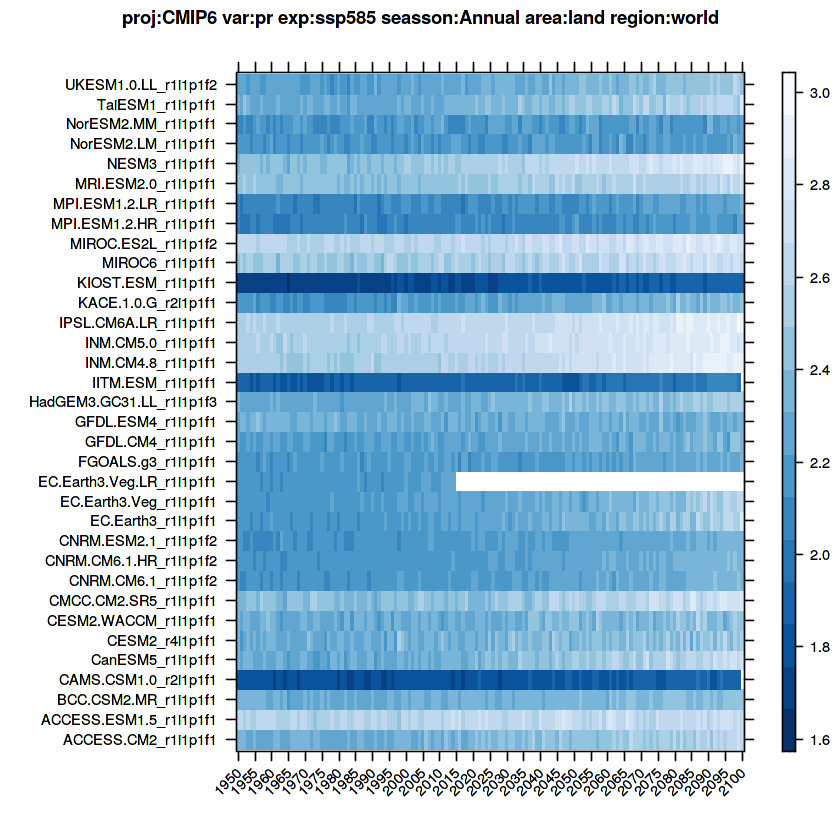

In [3]:
computeStripes(project = "CMIP6", 
               var = "pr",
               experiment = "ssp585",
               season = 1:12,
               area = "land",
               region = "world",
               cordex.domain = NULL,
               brewer.pal.name = "Blues",
               rev.colors = TRUE)

Play with the parameter options for different configurations. For instance, change the variable (`var = "tas"`) or use additional graphical parameters (type `?levelplot` to check available parameters) to, for instance, change the title (`main = list("Stripes of Mediterranean mean temperature for CMIP6", cex = 1.5)`) or the width of the colorkey (`colorkey = list(width = 2)`). 

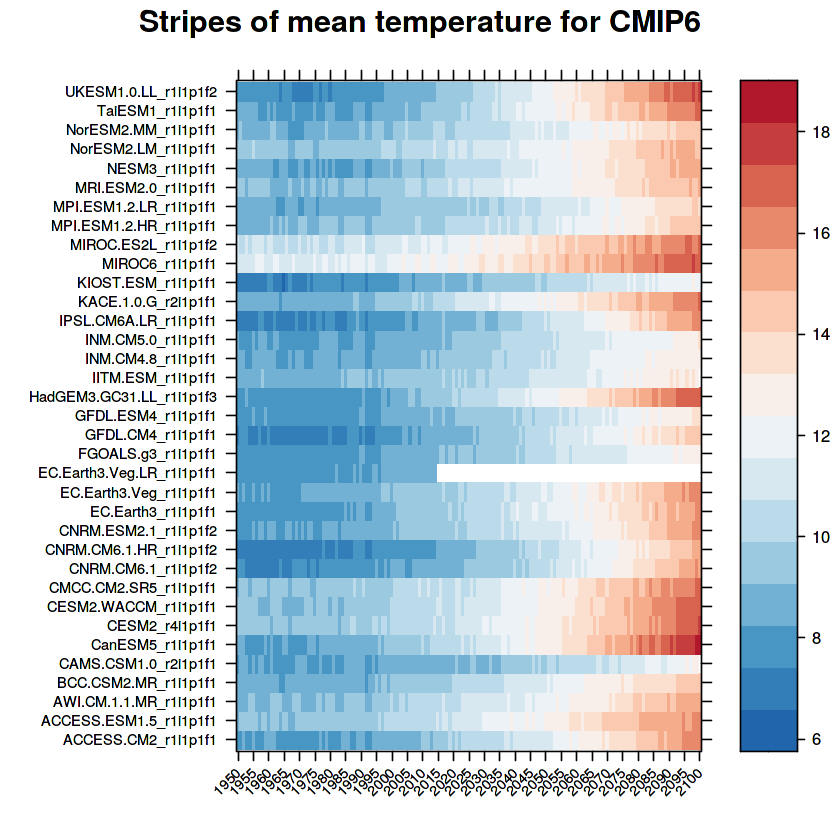

In [4]:
computeStripes(project = "CMIP6", 
               var = "tas",
               experiment = "ssp585",
               season = 1:12,
               area = "land",
               region = "world",
               cordex.domain = NULL,
               brewer.pal.name = "RdBu",
               rev.colors = TRUE,
               main = list("Stripes of mean temperature for CMIP6", cex = 1.5),
               colorkey = list(width = 4))

#### Regional stripes

Use the name of any of the **reference-regions** available in this repository, for instance "MED" (Mediterranean) in the next example. As "MED" can be considered both land or sea, here we will select the mediterranean sea:

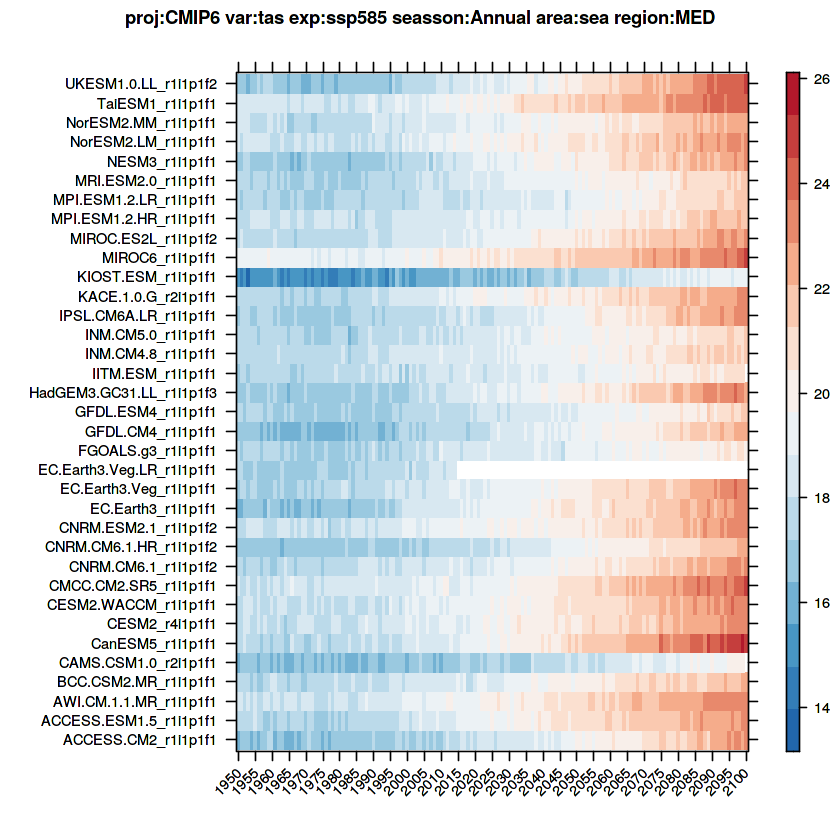

In [5]:
computeStripes(project = "CMIP6", 
               var = "tas",
               experiment = "ssp585",
               season = 1:12,
               area = "sea",
               region = "MED",
               cordex.domain = NULL,
               brewer.pal.name = "RdBu",
               rev.colors = TRUE)

Lets consider summer values for CORDEX (`season = 6:8` and `project = "CORDEX"`). We need to specify a CORDEX domain, for instance `cordex.domain = "AFR"` (we could also select "EUR", as both domains cover the MED region). We will also change the color palette (`brewer.pal.name = "RdGy"`)

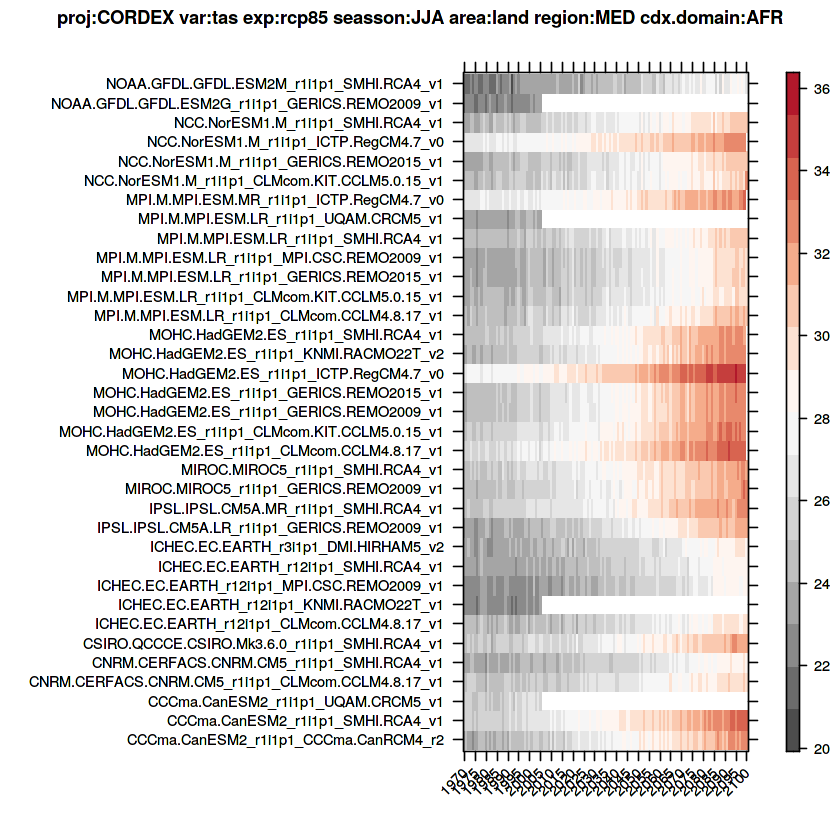

In [6]:
computeStripes(project = "CORDEX", 
               var = "tas",
               experiment = "rcp85",
               season = 6:8,
               area = "land",
               region = "MED",
               cordex.domain = "AFR",
               brewer.pal.name = "RdGy",
               rev.colors = TRUE)

In [7]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 14.04.6 LTS

Matrix products: default
BLAS:   /usr/lib/libblas/libblas.so.3.0
LAPACK: /usr/lib/lapack/liblapack.so.3.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=es_ES.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=es_ES.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=es_ES.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=es_ES.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] RColorBrewer_1.1-2  latticeExtra_0.6-29 lattice_0.20-41    
[4] httr_1.4.1          magrittr_1.5       

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.5      png_0.1-7       digest_0.6.25   crayon_1.3.4   
 [5] IRdisplay_0.7.0 grid_3.6.3      R6_2.4.1        repr_1.1.0     
 [9] jsonlite